In [1]:
from mxnet import gluon
from mxnet import ndarray as nd

def transform(data, label):
    return data.astype('float32')/255, label.astype('float32')
mnist_train = gluon.data.vision.FashionMNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.FashionMNIST(train=False, transform=transform)

In [2]:
data, label = mnist_train[0]
('example shape: ', data.shape, 'label:', label)

('example shape: ', (28, 28, 1), 'label:', 2.0)

In [6]:
print(data, label)


[[[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [

In [7]:
import matplotlib.pyplot as plt

In [8]:
def show_images(images):
    n = images.shape[0]
    _, figs = plt.subplots(1, n, figsize=(15, 15))
    for i in range(n):
        figs[i].imshow(images[i].reshape((28, 28)).asnumpy())
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()

In [9]:
def get_text_labels(label):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress,', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in label]

In [10]:
data, label = mnist_train[0:9]

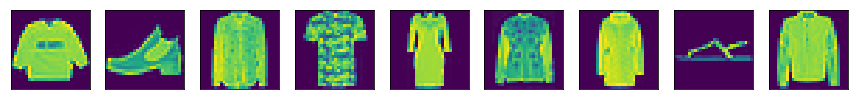

In [11]:
show_images(data)

In [13]:
print(get_text_labels(label))

['pullover', 'ankle boot', 'shirt', 't-shirt', 'dress,', 'coat', 'coat', 'sandal', 'coat']


In [14]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size, shuffle=True)
test_data = gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

In [15]:
num_inputs = 784
num_outputs = 10

W = nd.random_normal(shape=(num_inputs, num_outputs))
b = nd.random_normal(shape=num_outputs)

params = [W, b]

In [16]:
for param in params:
    param.attach_grad()

In [17]:
from mxnet import nd
def softmax(X):
    exp = nd.exp(X)
    partition = exp.sum(axis=1, keepdims=True)
    return exp/partition

In [19]:
# Softmax showcase
X = nd.random_normal(shape=(2,5))
X_prob = softmax(X)
print(X_prob)
print(X_prob.sum(axis=1))


[[ 0.42250916  0.1234768   0.21075098  0.02119259  0.22207047]
 [ 0.05703577  0.43163839  0.04676707  0.20360941  0.26094934]]
<NDArray 2x5 @cpu(0)>

[ 1.  1.]
<NDArray 2 @cpu(0)>


In [20]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

In [21]:
def cross_entropy(yhat, y):
    return -nd.pick(nd.log(yhat), y)

In [22]:
def accuracy(output, label):
    return nd.mean(output.argmax(axis=1)==label).asscalar()

In [23]:
def evaluate_accuracy(data_iterator, net):
    acc = 0.
    for data, label in data_iterator:
        output = net(data)
        acc += accuracy(output, label)
    return acc / len(data_iterator)

In [24]:
evaluate_accuracy(test_data, net)

0.089746093750000006

In [26]:
import sys
sys.path.append('.')

In [28]:
from utils import SGD
from mxnet import autograd

learning_rate = .1

for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data, label in train_data:
        with autograd.record():
            output = net(data)
            loss = cross_entropy(output, label)
        loss.backward()
        # 将梯度做平均，这样学习率会对batch size不那么敏感
        SGD(params, learning_rate/batch_size)

        train_loss += nd.mean(loss).asscalar()
        train_acc += accuracy(output, label)

    test_acc = evaluate_accuracy(test_data, net)
    print("Epoch %d. Loss: %f, Train acc %f, Test acc %f" % (
        epoch, train_loss/len(train_data), train_acc/len(train_data), test_acc))

ImportError: cannot import name 'SGD'